In [17]:
data2k <- read.csv("DATA/NUM_ONLY_censo-2000_Nacional_cleaned.csv")

head(data2k, 10)

,P_TOTAL,POB0_4,POB18_,PNACOENT,GRADOESCO,PCASADA12_,P_1SM,P1_2SM,P2_5SM,P6_10SM,P10_SM,T_VIVHAB,VIVPARHAB,PRO_OCVP,PRO_OVP,VP_TV,TOTHOG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,79,11,46,12,4,24,1,10,4,0,1,15,15,2.32,5.27,13,15
2,1059,160,530,226,6,394,33,144,161,6,4,201,201,2.09,5.27,191,212
3,69,3,44,5,5,22,6,16,4,0,1,12,12,1.86,5.75,12,12
4,588,74,326,57,5,232,9,102,79,3,1,116,116,1.76,5.07,113,121
5,177,17,100,15,5,56,4,22,15,0,1,35,35,1.72,5.06,34,35
6,264,49,121,15,6,93,8,23,22,2,0,53,53,2.37,4.98,41,55
7,383,50,229,38,7,155,4,28,61,6,1,79,79,1.59,4.85,75,88
8,947,119,488,200,5,343,35,91,55,4,3,207,207,1.55,4.57,199,210
9,873,112,435,67,5,352,16,94,45,4,0,195,195,1.62,4.48,187,195


In [18]:
#cargar librerías
library(tidyverse)
library(sf)
library(ggplot2)

### Definimos un promedio de salarios minimos en cada fila (localidad)

la pregunta será: 
* que tanto peso tiene el resto de variables en el promedio de salarios minimos?
* será mejor un modelo con todas las variables? (ANOVA) (?)

In [19]:
#reemplazamos columnas 'P_1SM' 'P1_2SM' 'P2_5SM' 'P6_10SM' 'P10_SM' por un promedio de estas
#test: primera fila: 1	10	4	0	1 
#promedio = (1 + 10 + 4 + 0 + 1) / 5 = 3.2

data2k$PROM_SM <- (data2k$P_1SM + data2k$P1_2SM + data2k$P2_5SM + data2k$P6_10SM + data2k$P10_SM) / 5

#quitamos cada columna de salario minimo
data2k <- data2k[, !(names(data2k) %in% c('P_1SM', 'P1_2SM', 'P2_5SM', 'P6_10SM', 'P10_SM'))]

head(data2k, 10)

,P_TOTAL,POB0_4,POB18_,PNACOENT,GRADOESCO,PCASADA12_,T_VIVHAB,VIVPARHAB,PRO_OCVP,PRO_OVP,VP_TV,TOTHOG,PROM_SM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,79,11,46,12,4,24,15,15,2.32,5.27,13,15,3.2
2,1059,160,530,226,6,394,201,201,2.09,5.27,191,212,69.6
3,69,3,44,5,5,22,12,12,1.86,5.75,12,12,5.4
4,588,74,326,57,5,232,116,116,1.76,5.07,113,121,38.8
5,177,17,100,15,5,56,35,35,1.72,5.06,34,35,8.4
6,264,49,121,15,6,93,53,53,2.37,4.98,41,55,11.0
7,383,50,229,38,7,155,79,79,1.59,4.85,75,88,20.0
8,947,119,488,200,5,343,207,207,1.55,4.57,199,210,37.6
9,873,112,435,67,5,352,195,195,1.62,4.48,187,195,31.8


In [20]:
summary(data2k)

    P_TOTAL           POB0_4             POB18_            PNACOENT       
 Min.   :     3   Min.   :    0.00   Min.   :     0.0   Min.   :    0.00  
 1st Qu.:    23   1st Qu.:    3.00   1st Qu.:    12.0   1st Qu.:    0.00  
 Median :    79   Median :   11.00   Median :    39.0   Median :    1.00  
 Mean   :   451   Mean   :   57.51   Mean   :   254.9   Mean   :   75.73  
 3rd Qu.:   255   3rd Qu.:   37.00   3rd Qu.:   127.0   3rd Qu.:   10.00  
 Max.   :502964   Max.   :52549.00   Max.   :315255.0   Max.   :98638.00  
                  NA's   :472        NA's   :472        NA's   :472       
   GRADOESCO        PCASADA12_          T_VIVHAB           VIVPARHAB       
 Min.   : 0.000   Min.   :     0.0   Min.   :     1.00   Min.   :     0.0  
 1st Qu.: 3.000   1st Qu.:     8.0   1st Qu.:     5.00   1st Qu.:     5.0  
 Median : 4.000   Median :    29.0   Median :    16.00   Median :    16.0  
 Mean   : 4.303   Mean   :   181.8   Mean   :    98.69   Mean   :   100.3  
 3rd Qu.: 5.000   3r

In [21]:
glimpse(data2k)

Rows: 8,669
Columns: 13
$ P_TOTAL    <dbl> 79, 1059, 69, 588, 177, 264, 383, 947, 873, 11, 42, 200, 28…
$ POB0_4     <dbl> 11, 160, 3, 74, 17, 49, 50, 119, 112, 1, 7, 35, 33, 7, 5, 7…
$ POB18_     <dbl> 46, 530, 44, 326, 100, 121, 229, 488, 435, 9, 27, 104, 155,…
$ PNACOENT   <dbl> 12, 226, 5, 57, 15, 15, 38, 200, 67, 0, 2, 13, 38, 6, 10, 1…
$ GRADOESCO  <dbl> 4, 6, 5, 5, 5, 6, 7, 5, 5, 6, 5, 5, 5, 7, 3, 5, 7, 8, 4, 5,…
$ PCASADA12_ <dbl> 24, 394, 22, 232, 56, 93, 155, 343, 352, 6, 20, 76, 106, 16…
$ T_VIVHAB   <dbl> 15, 201, 12, 116, 35, 53, 79, 207, 195, 3, 10, 36, 58, 7, 6…
$ VIVPARHAB  <dbl> 15, 201, 12, 116, 35, 53, 79, 207, 195, 3, 10, 36, 58, 7, 6…
$ PRO_OCVP   <dbl> 2.32, 2.09, 1.86, 1.76, 1.72, 2.37, 1.59, 1.55, 1.62, 1.83,…
$ PRO_OVP    <dbl> 5.27, 5.27, 5.75, 5.07, 5.06, 4.98, 4.85, 4.57, 4.48, 3.67,…
$ VP_TV      <dbl> 13, 191, 12, 113, 34, 41, 75, 199, 187, 3, 9, 34, 53, 7, 6,…
$ TOTHOG     <dbl> 15, 212, 12, 121, 35, 55, 88, 210, 195, 3, 10, 38, 58, 7, 6…
$ PROM_SM    <db

In [22]:
data2k <- na.omit(data2k)


Call:
lm(formula = PROM_SM ~ ., data = data2k)

Residuals:
    Min      1Q  Median      3Q     Max 
-267.31   -0.73    1.21    2.62  423.36 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4266207  0.7558336   0.564 0.572472    
P_TOTAL     -0.0945230  0.0026175 -36.112  < 2e-16 ***
POB0_4       0.4535314  0.0075789  59.841  < 2e-16 ***
POB18_       0.1786059  0.0042411  42.113  < 2e-16 ***
PNACOENT     0.0020041  0.0006059   3.308 0.000945 ***
GRADOESCO   -0.1361300  0.0794439  -1.714 0.086652 .  
PCASADA12_  -0.1438141  0.0045822 -31.386  < 2e-16 ***
T_VIVHAB     0.5195937  0.0188506  27.564  < 2e-16 ***
VIVPARHAB   -1.0732385  0.0297907 -36.026  < 2e-16 ***
PRO_OCVP     0.3488696  0.1615722   2.159 0.030862 *  
PRO_OVP     -0.5714624  0.1390296  -4.110 3.99e-05 ***
VP_TV        0.1351991  0.0039377  34.335  < 2e-16 ***
TOTHOG       0.6789565  0.0192538  35.263  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid

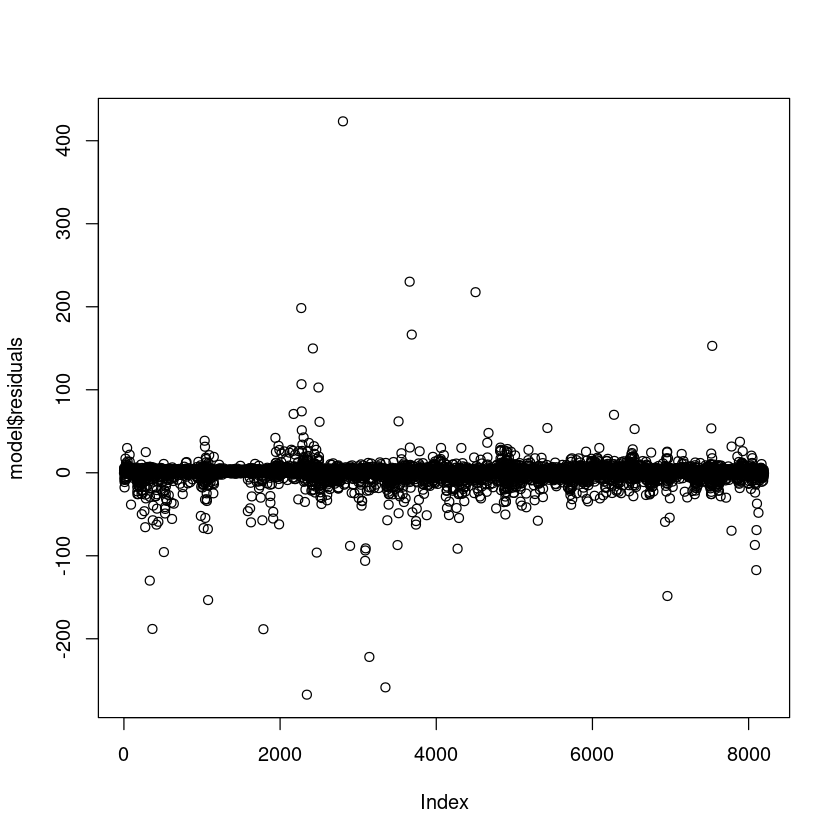

In [24]:
#modelo de regresion lineal
model <- lm(PROM_SM ~ ., data = data2k)

summary(model)

#graficamos los residuales
plot(model$residuals)